<h1>Table of Contents (Clickable in sidebar)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-Question" data-toc-modified-id="Research-Question-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Research Question</a></span></li><li><span><a href="#Load-main-'stocks'-df-and-begin-EDA" data-toc-modified-id="Load-main-'stocks'-df-and-begin-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load main 'stocks' df and begin EDA</a></span><ul class="toc-item"><li><span><a href="#pd.read_csv('raw/stocks.csv')" data-toc-modified-id="pd.read_csv('raw/stocks.csv')-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>pd.read_csv('raw/stocks.csv')</a></span></li><li><span><a href="#df.head()" data-toc-modified-id="df.head()-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>df.head()</a></span></li><li><span><a href="#df-shape-is--small-(1708,-14)" data-toc-modified-id="df-shape-is--small-(1708,-14)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>df shape is  small (1708, 14)</a></span></li><li><span><a href="#df.dtypes" data-toc-modified-id="df.dtypes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>df.dtypes</a></span></li><li><span><a href="#The-df.nunique()-method-reveals--following-2-issues-in-categorical-data:" data-toc-modified-id="The-df.nunique()-method-reveals--following-2-issues-in-categorical-data:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>The df.nunique() method reveals  following 2 issues in categorical data:</a></span></li><li><span><a href="#'Flag-Description'" data-toc-modified-id="'Flag-Description'-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>'Flag Description'</a></span></li></ul></li><li><span><a href="#Why-do-we-have-one-more-area-than-expected?" data-toc-modified-id="Why-do-we-have-one-more-area-than-expected?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Why do we have one more area than expected?</a></span></li><li><span><a href="#Investigate-historical--cattle-stock-reporting-in-the-BENELUX-and---BELUX-union-areas" data-toc-modified-id="Investigate-historical--cattle-stock-reporting-in-the-BENELUX-and---BELUX-union-areas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Investigate historical  cattle stock reporting in the BENELUX and   BELUX union areas</a></span></li><li><span><a href="#Revise-a-research-question-to-more-recent-years-of-2000-2021" data-toc-modified-id="Revise-a-research-question-to-more-recent-years-of-2000-2021-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Revise a research question to more recent years of 2000-2021</a></span></li><li><span><a href="#Update-the-time-frame-of-our-main-Dataframe-df" data-toc-modified-id="Update-the-time-frame-of-our-main-Dataframe-df-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Update the time frame of our main Dataframe df</a></span></li><li><span><a href="#The-devil-is-in-the-dtypes!" data-toc-modified-id="The-devil-is-in-the-dtypes!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The devil is in the dtypes!</a></span></li><li><span><a href="#The-Cattle-Stock---cast-them-as-32-bit-integers" data-toc-modified-id="The-Cattle-Stock---cast-them-as-32-bit-integers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The Cattle Stock   cast them as 32-bit integers</a></span></li><li><span><a href="#This-Jupyter-Notebook-has-focussed-on-cleaning-our-target-variable" data-toc-modified-id="This-Jupyter-Notebook-has-focussed-on-cleaning-our-target-variable-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>This Jupyter Notebook has focussed on cleaning our target variable</a></span></li><li><span><a href="#We-finished-up-with-..." data-toc-modified-id="We-finished-up-with-...-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>We finished up with ...</a></span></li><li><span><a href="#Run-notebook-02_data_wrangling_beef.jpynb-from-the--root-directory-next." data-toc-modified-id="Run-notebook-02_data_wrangling_beef.jpynb-from-the--root-directory-next.-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Run notebook 02_data_wrangling_beef.jpynb from the  root directory next.</a></span><ul class="toc-item"><li><span><a href="#Boxplot--of-cattle-stock" data-toc-modified-id="Boxplot--of-cattle-stock-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Boxplot  of cattle stock</a></span></li><li><span><a href="#Outliers-in-Cattle-Stock-Data" data-toc-modified-id="Outliers-in-Cattle-Stock-Data-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Outliers in Cattle Stock Data</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis EU Beef
## Research Question
How has Ireland's beef sector performed compared to the EU 27 countries from 1961 to 2021, and can we forecast future prices using historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period?



In [207]:
### Data Manipulation and Analysis

import pandas as pd
import numpy as np
import fancyimpute
import missingno as msno
from functools import partial, reduce

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg


### Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import fancyimpute
from scipy.stats import ks_2samp

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

### File System and OS
import pickle
import glob
import os
import warnings


### Date and Time
import datetime
import time

### Data Presentation
from tabulate import tabulate
from IPython.display import HTML, Image, display

### Text Processing
import html
import re

### Working with Countries and Regions
from countrygroups import EUROPEAN_UNION
from countryinfo import CountryInfo
import pycountry

pd.options.mode.use_inf_as_na = True

#managing warnings(ignoring them mostly)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)     
warnings.filterwarnings('ignore')

#setting display options
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (25, 14)
plt.style.use('seaborn-whitegrid')

from matplotlib.pyplot import cm
color = 'tab20c'


## Load main 'stocks' df and begin EDA

### pd.read_csv('raw/stocks.csv') 
Data downloaded from [FAOSTAT](https://www.fao.org/faostat/en/#data/domains_table)

### df.head() 
Direct look at first 5 rows
###  df shape is  small (1708, 14)
The shape  of rows and columns, is relatively small (1708, 14).

1708 is enough rows for training without overfitting  while small enough for simple and  interpretable model. Nevertheless this will likely be reduced. 

The 14 columns wont all be features available for the model as only most relevant and informative features  will be kept and irrelevant or redundant ones will be dropped.

### df.dtypes 

We will change the Year column data  type of a  in a Pandas DataFrame from int64 to int32 using the astype() method

We will change the 'Value'column type from              float64 to int32

### The df.nunique() method reveals  following 2 issues in categorical data:

1. Flag Description 
- We have 1160		Estimated values
- and 1182 	Unofficial figure
- In the context of this data analysis, these "estimated value" and "unofficial figures" might have  significant impact on the accuracy and reliability of our conclusion. 
2. The European Union (EU) is a political and economic union of 27 member states and yet we have 28  unique values of Area. This is more pressing than the flag describtiopns and is investigated first.
### 'Flag Description' 
Apply .drop_duplicates()

61	NaN	NaN

1160	E	Estimated value

1182	T	Unofficial figure



In [208]:
"""
Become aquainted with data structure management system
"""
# print(os.getcwd()) # working directory.
# print(os.listdir('.')) #List current directory
#print(os.listdir('raw')) # Our source files from FAOSTAT are in 'data' folder

'\nBecome aquainted with data structure management system\n'

In [209]:
df = pd.read_csv('input/stocks.csv') # read  stock CSV file  df
print(df.shape) #(1708, 14)
print('\n\n','Value  type need to be cast to int', '\n\n',df.dtypes) 
print('\n\n','stock df shows 28  countries but there is only 27 in the EU!\n','\n\n',df.nunique()) #  We have 28  country/ regions repoorting and 61 yearsof data

(1708, 14)


 Value  type need to be cast to int 

 Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object


 stock df shows 28  countries but there is only 27 in the EU!
 

 Domain Code            1
Domain                 1
Area Code (M49)       28
Area                  28
Element Code           1
Element                1
Item Code (CPC)        1
Item                   1
Year Code             61
Year                  61
Unit                   1
Value               1365
Flag                   3
Flag Description       3
dtype: int64


In [210]:
# df[['Flag', 'Flag Description']].drop_duplicates() 
missing_df=df.isnull().sum()
missing_df

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                319
Value               319
Flag                319
Flag Description    319
dtype: int64

In [211]:
# missing = missing_df.values  #NumPy array
# missing_df.to_csv('clean/missing.csv', index=False)
# np.save('clean/missing.npy', missing)
# print(df.isnull().sum()) #  Check for missing values throughout df and shows 319 cases
# df.head() #: returns the first few rows of the DataFrame indicating many fields may be invariant and reduntant

## Why do we have one more area than expected?
Belgium and Luxembourg used to act as an economic union called 'BELUX'
This extended at times to Belgium, the Netherlands, and Luxembourg collectively termedd  'Benelux' 


The unique() method returns an array of unique values in the order in which they appear in the original DataFrame column. In this case, the array contains all the unique values in the "Area" column.

After executing the statement, the resulting array is assigned to a variable called areasEu.


Belgium-Luxembourg started reporting beef stocks independently in 2000
As part of the BLEU,  1999. After 1999, they started reporting independently.
We zoom in on the df around 2000 and compare the three countries by plot with the Netherland s now acting as an exemplar of the rest of the coutries

In [212]:
# Define an 'areas'  array
areas = df['Area'].unique() #  one-dimensional NumPy array
# print the areas array
print(areas)
# Save the array to a file
np.save('clean/areas.npy', areas)
# Convert the 'areas' array to areas_df DataFrame 
areas_df = pd.DataFrame({'Area':areas})
areas_df.to_csv('cleanareas.csv')
# and take a look to discover BELUX anomoly
belux_df=df[df['Area'].isin(['Belgium-Luxembourg', 'Belgium', 'Luxembourg'])]
benelux_df = df[df['Area'].isin(['Belgium-Luxembourg', 'Belgium', 'Luxembourg', 'Netherlands'])]
benelux_df.sample(5) 

['Austria' 'Belgium' 'Belgium-Luxembourg' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden']


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
105,QCL,Crops and livestock products,56,Belgium,5111,Stocks,2111,Cattle,2005,2005,Head,2698649.0,A,Official figure
111,QCL,Crops and livestock products,56,Belgium,5111,Stocks,2111,Cattle,2011,2011,Head,2560319.0,A,Official figure
1229,QCL,Crops and livestock products,528,Netherlands,5111,Stocks,2111,Cattle,1970,1970,Head,3679000.0,A,Official figure
142,QCL,Crops and livestock products,58,Belgium-Luxembourg,5111,Stocks,2111,Cattle,1981,1981,Head,3116000.0,A,Official figure
119,QCL,Crops and livestock products,56,Belgium,5111,Stocks,2111,Cattle,2019,2019,Head,2373100.0,A,Official figure



## Investigate historical  cattle stock reporting in the BENELUX and   BELUX union areas
We discovered above that there were 28 unique entries for "Area" despite there being only 27 EU countries. Further investigation beloe reveals that Belgium and Luxembourg reported economic data as one region but the Netherlands who also participated in an economic union with  Belgium and Luxembourg known collectively as Benelux reported cattle stock independantly as did all other 24 EU countries. To ensure a focussed investigation, we will filter the DataFrame to only include data from these three countries and use the pivot() method in pandas to reshape the DataFrame and compare reporting practice patterns between all three. The conclusion will be that: The  Netherlands reported cattle stock independently for all 61 years of our research interval, while Belgium 
and Luxembourg reported collectively as the Benelux region from 1961 to 1999 when they split and started reporting individually.

In [213]:
# Reshape the DataFrame with pivot()
beluxPivot_df = belux_df.pivot(index='Year', columns='Area', values='Value')
# Reshape the DataFrame with pivot()
beneluxPivot_df = benelux_df.pivot(index='Year', columns='Area', values='Value')
# Rename the columns of the pivot table
beluxPivot=beluxPivot_df.columns = ['{}_stock'.format(col.replace(' ', '_')) for col in beluxPivot_df.columns]
# Rename the columns of the pivot table
beneluxPivot=beneluxPivot_df.columns = ['{}_stock'.format(col.replace(' ', '_')) for col in beneluxPivot_df.columns]

In [214]:

# Write all 4 CSV file
beneluxPivot_df.to_csv('clean/beneluxPivot.csv', index=False)
beluxPivot_df.to_csv('clean/beluxPivot.csv', index=False)
np.save('clean/beneluxPivot.npy', beneluxPivot)
beneluxPivot_df.to_csv('clean/beneluxPivot.csv', index=False)

In [215]:
print(os.listdir('clean'))
beneluxPivot_df

['arch', 'areas.npy', 'AreasEU.csv', 'beluxPivot.csv', 'beneluxPivot.csv', 'beneluxPivot.npy', 'benelux_pivot.csv', 'cattle_stocks.csv', 'kept_countries.txt', 'main.csv', 'main_stock_cckp.csv', 'meadowpasture.csv', 'missing.csv', 'missing.npy', 'nutrient2002', 'nutrient2002.csv', 'orderedstock.csv', 'rain.csv', 'stock.csv', 'stockkey.csv', 'stock_cckp.csv', 'temperature.csv', 'topstock.txt', 'top_10_countries_stock.csv', 'top_countries.txt', 'top_countries_stock.csv']


,Belgium_stock,Belgium-Luxembourg_stock,Luxembourg_stock,Netherlands_stock
Year,,,,
1961,NaN,2684120.0,NaN,3622588.0
1962,NaN,2798130.0,NaN,3816942.0
1963,NaN,2847478.0,NaN,3695185.0
1964,NaN,2641407.0,NaN,3567379.0
1965,NaN,2685510.0,NaN,3750629.0
...,...,...,...,...
2017,2385988.0,NaN,202281.0,4030000.0
2018,2398090.0,NaN,194390.0,3690000.0
2019,2373100.0,NaN,192100.0,3721000.0


In [216]:
benelux_1997_2002_df = beneluxPivot_df.loc['1997':'2003']
benelux_1997_2002_df.head(6)

,Belgium_stock,Belgium-Luxembourg_stock,Luxembourg_stock,Netherlands_stock
Year,,,,
1997,NaN,3280000.0,NaN,4411000.0
1998,NaN,3184000.0,NaN,4283000.0
1999,NaN,3395000.0,NaN,4206000.0
2000,3041560.0,NaN,205072.0,4070000.0
2001,3037760.0,NaN,205193.0,4047000.0
2002,2891260.0,NaN,197257.0,3858000.0


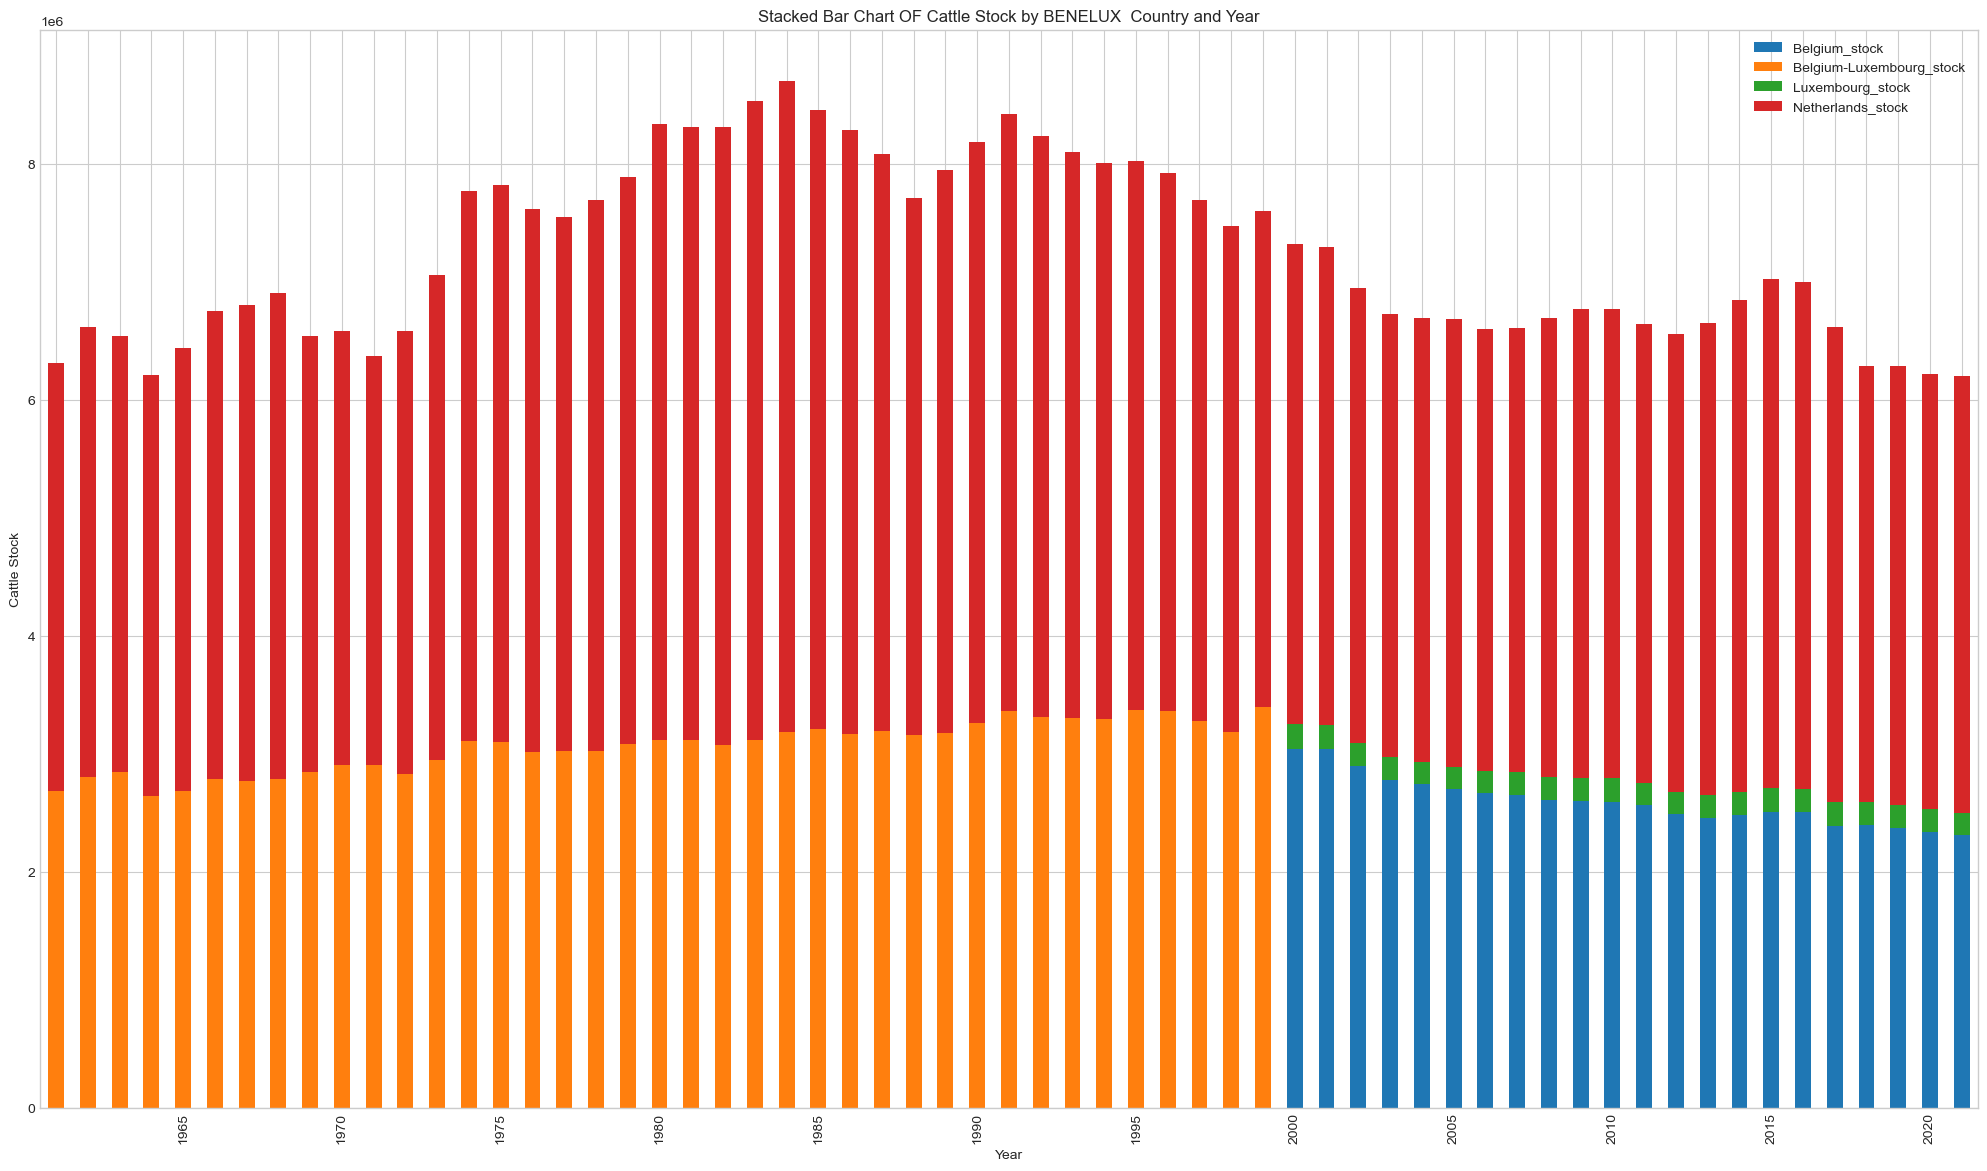

In [217]:
import numpy as np

fig, ax = plt.subplots()

beneluxPivot_df.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Cattle Stock')
ax.set_title('Stacked Bar Chart OF Cattle Stock by BENELUX  Country and Year')

# set x-tick labels to show only multiples of 5
years = beneluxPivot_df.index.get_level_values('Year').unique()
xticklabels = [str(year) if year % 5 == 0 else '' for year in years]
ax.set_xticklabels(xticklabels)

plt.show()

## Revise a research question to more recent years of 2000-2021

We  update the time frame of the researh  to 2000 to 2021 completely mitihgating against any need to fill missing data in Luxemburg and Belbium to approximate shares of the BELUX stock reports for these years.

How has Ireland's beef sector performed compared to the EU 27 countries since 2000, and can we forecast future prices using this historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period? By focusing on data from 2000 onwards, we can better capture the current state of the beef industry and make more relevant predictions about future trends. At the end of 1999, the Benelux union ceased to report beef stock data as a single entity, as each member country began reporting its data individually. This change reflected the increasing economic development and growth of the individual countries within the union. This not only created the data reason for us to only researh the 21st era but it also provides a fiscal reason for the refining of the researh question.

In [218]:
os.listdir('clean')

['arch',
 'areas.npy',
 'AreasEU.csv',
 'beluxPivot.csv',
 'beneluxPivot.csv',
 'beneluxPivot.npy',
 'benelux_pivot.csv',
 'cattle_stocks.csv',
 'kept_countries.txt',
 'main.csv',
 'main_stock_cckp.csv',
 'meadowpasture.csv',
 'missing.csv',
 'missing.npy',
 'nutrient2002',
 'nutrient2002.csv',
 'orderedstock.csv',
 'rain.csv',
 'stock.csv',
 'stockkey.csv',
 'stock_cckp.csv',
 'temperature.csv',
 'topstock.txt',
 'top_10_countries_stock.csv',
 'top_countries.txt',
 'top_countries_stock.csv']

## Update the time frame of our main Dataframe df
Apart from solving the BELUX data cleaning problem recasting the research question to 2000-2021 acknowledges
 that 
farming in the 20th centuary was significantly different than from now so dropping this old data makes the data we keep more  relevant  for modelling current multivariate trends and predicting future trends along with suggested mittigations.



By fixing our **BELUX** problem the estimation and unoffial stock reportig flags hae also dissapeared and we have killed two birds with the one stone so to speak! We will also do some relabelling and reduce dimesionality based on nvariant data.

The df.nunique() method to identify invariant data
The df.nunique() method returns the number of unique values in each column of our beef stocks data. This isuseful for identifying columns that have only one value like the **Domain** which is **Crops and livestock products**. All of this invariant data is redundant data that can be dropped to reduce the size of the DataFrame or improve the performance of data analyses. Note the Element header had **Stock** as every value and this was useful in that we used it to rename the Value field. It no longer of any use and gets the chop. selecting a subset of columns from a Pandas DataFrame. Selecting a  relatively small subset of columns is useful when you are keeping less than half of the fields.



In [219]:
df = df[df['Year'] >= 2000]
df = df.loc[df['Area'] != 'Belgium-Luxembourg'] 
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
39,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2000,2000,Head,2152811.0,A,Official figure
40,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2001,2001,Head,2155447.0,A,Official figure
41,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2002,2002,Head,2118454.0,A,Official figure
42,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2003,2003,Head,2066942.0,A,Official figure
43,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2004,2004,Head,2052033.0,A,Official figure


In [220]:
df = df.rename(columns={'Area': 'Country', 'Value': 'Stock'})
df = df[["Country", "Year", "Stock", "Flag", "Flag Description"]] # Easier to stipulate what we keep 

df.nunique() #  The df.nunique() method reveals 27 areas

Country              27
Year                 22
Stock               592
Flag                  1
Flag Description      1
dtype: int64

In [221]:
df.head() # Check 

,Country,Year,Stock,Flag,Flag Description
39,Austria,2000,2152811.0,A,Official figure
40,Austria,2001,2155447.0,A,Official figure
41,Austria,2002,2118454.0,A,Official figure
42,Austria,2003,2066942.0,A,Official figure
43,Austria,2004,2052033.0,A,Official figure


In [222]:
df.columns

Index(['Country', 'Year', 'Stock', 'Flag', 'Flag Description'], dtype='object')

In [223]:
flag_df = df[['Flag', 'Flag Description']].drop_duplicates()
print(flag_df) # Unofficial and estimated reports are gone
df.drop(['Flag', 'Flag Description'], axis=1, inplace=True)

   Flag Flag Description
39    A  Official figure


In [224]:
df.dtypes

Country     object
Year         int64
Stock      float64
dtype: object

## The devil is in the dtypes!

Stock is a  discreet value of heads of cattle and should be INT or mathematical $\mathbb{Z} $  not a  float64 which is mathematically a real number   $\mathbb{R}$. Integers are for counting distinct objects such as  cattle. Bad things can  happen when floating points are used for discreet values and modelling gets slowed down so we recast here.

Also int64 can represent a much larger range of values than int32, but it also requires more memory so we will recast the Year type from INT64 to INT32.  That allows for  up to the year 2,147,483,647 as calculated below.

In [225]:
df.isnull().sum()# returns the number of missing values in each column.

Country    0
Year       0
Stock      0
dtype: int64

In [226]:
max_int32 = int(2**32/2-1)
print(max_int32)  # the /2 is because integers are directed numbers and the -1 accounts for 0!


2147483647


In [227]:
## The absence of mising values frees us up to cast values to integers. We can't have live bovine parts!
df['Stock'] = df['Stock'].astype(int)
# Cast the 'Year' column from int64 to int32
df['Year'] = df['Year'].astype('int32')
df.dtypes # Check


Country    object
Year        int32
Stock       int32
dtype: object

In [228]:
df.info()# provides a concise summary of the DataFrame, including column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 39 to 1707
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  594 non-null    object
 1   Year     594 non-null    int32 
 2   Stock    594 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 13.9+ KB


In [229]:
print(df.head())
df.dtypes


    Country  Year    Stock
39  Austria  2000  2152811
40  Austria  2001  2155447
41  Austria  2002  2118454
42  Austria  2003  2066942
43  Austria  2004  2052033


Country    object
Year        int32
Stock       int32
dtype: object

## The Cattle Stock   cast them as 32-bit integers


If the output of df.isnull().sum()  tells us that the cattle stock array has no null values, and assumed to be  non-null and valid.

The cattle stock column was originally stored as a float but should be an integer and we cast it to the integer data type.  Weuse the astype() method in pandas to convert the column to an integer data type as follows:

## This Jupyter Notebook has focussed on cleaning our target variable 
- Lets punctuate the workflow by  continue with quality checking, visualisation, and merging data in the next Notebook.
- We will need to do some rigorous testing and visualisaton on it as well as merging it with expected predictor variables before any modelling and machine learning but progress has been made along with piles of enjoyable learning on the authors part.

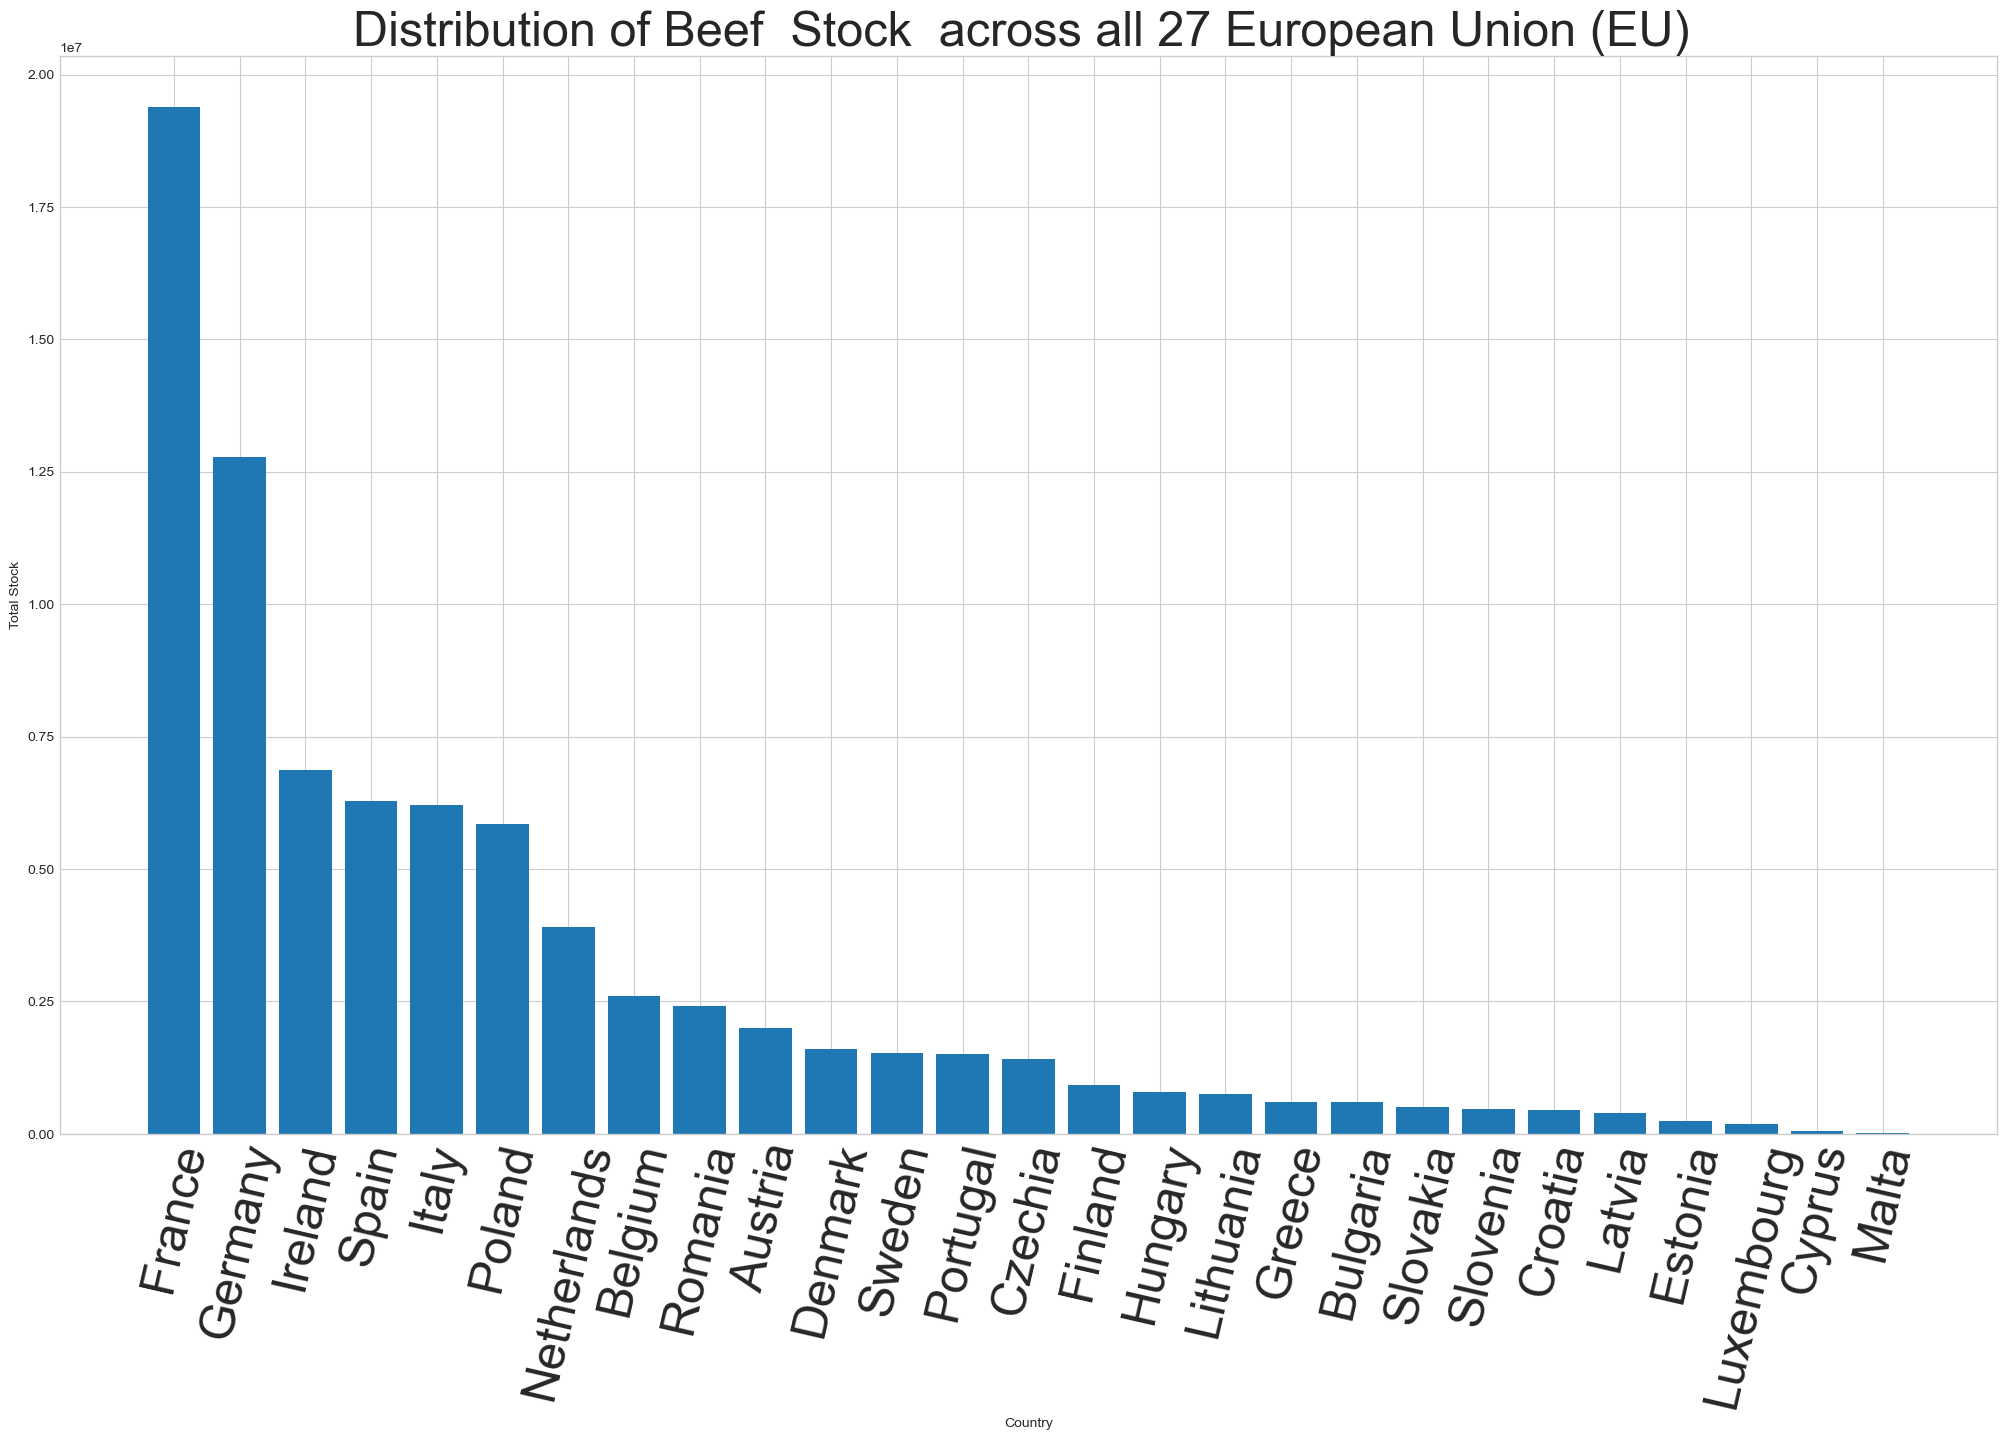

There is a distinct elbow at the Netherlands and as we will see later there is  a lot of missing nutrient data for the Netherlands  so we choose the top 6 countries


In [230]:
#managing warnings(ignoring them mostly)
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)     
# warnings.filterwarnings('ignore')
pd.options.mode.use_inf_as_na = True
#setting display options
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (25, 14)
plt.style.use('seaborn-whitegrid')

from matplotlib.pyplot import cm
color = 'tab20c'

df_grouped = df.groupby('Country')['Stock'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='Stock', ascending=False).reset_index(drop=True)

plt.bar(df_grouped['Country'][:len(df_grouped)], df_grouped['Stock'][:len(df_grouped)])

plt.title('Distribution of Beef  Stock  across all 27 European Union (EU) ', fontsize=35)
plt.xlabel('Country')
plt.ylabel('Total Stock')
plt.xticks(rotation = 77, fontsize=35)
plt.show()
print('There is a distinct elbow at the Netherlands and as we will see later there is  a lot of missing nutrient data for the Netherlands  so we choose the top 6 countries')

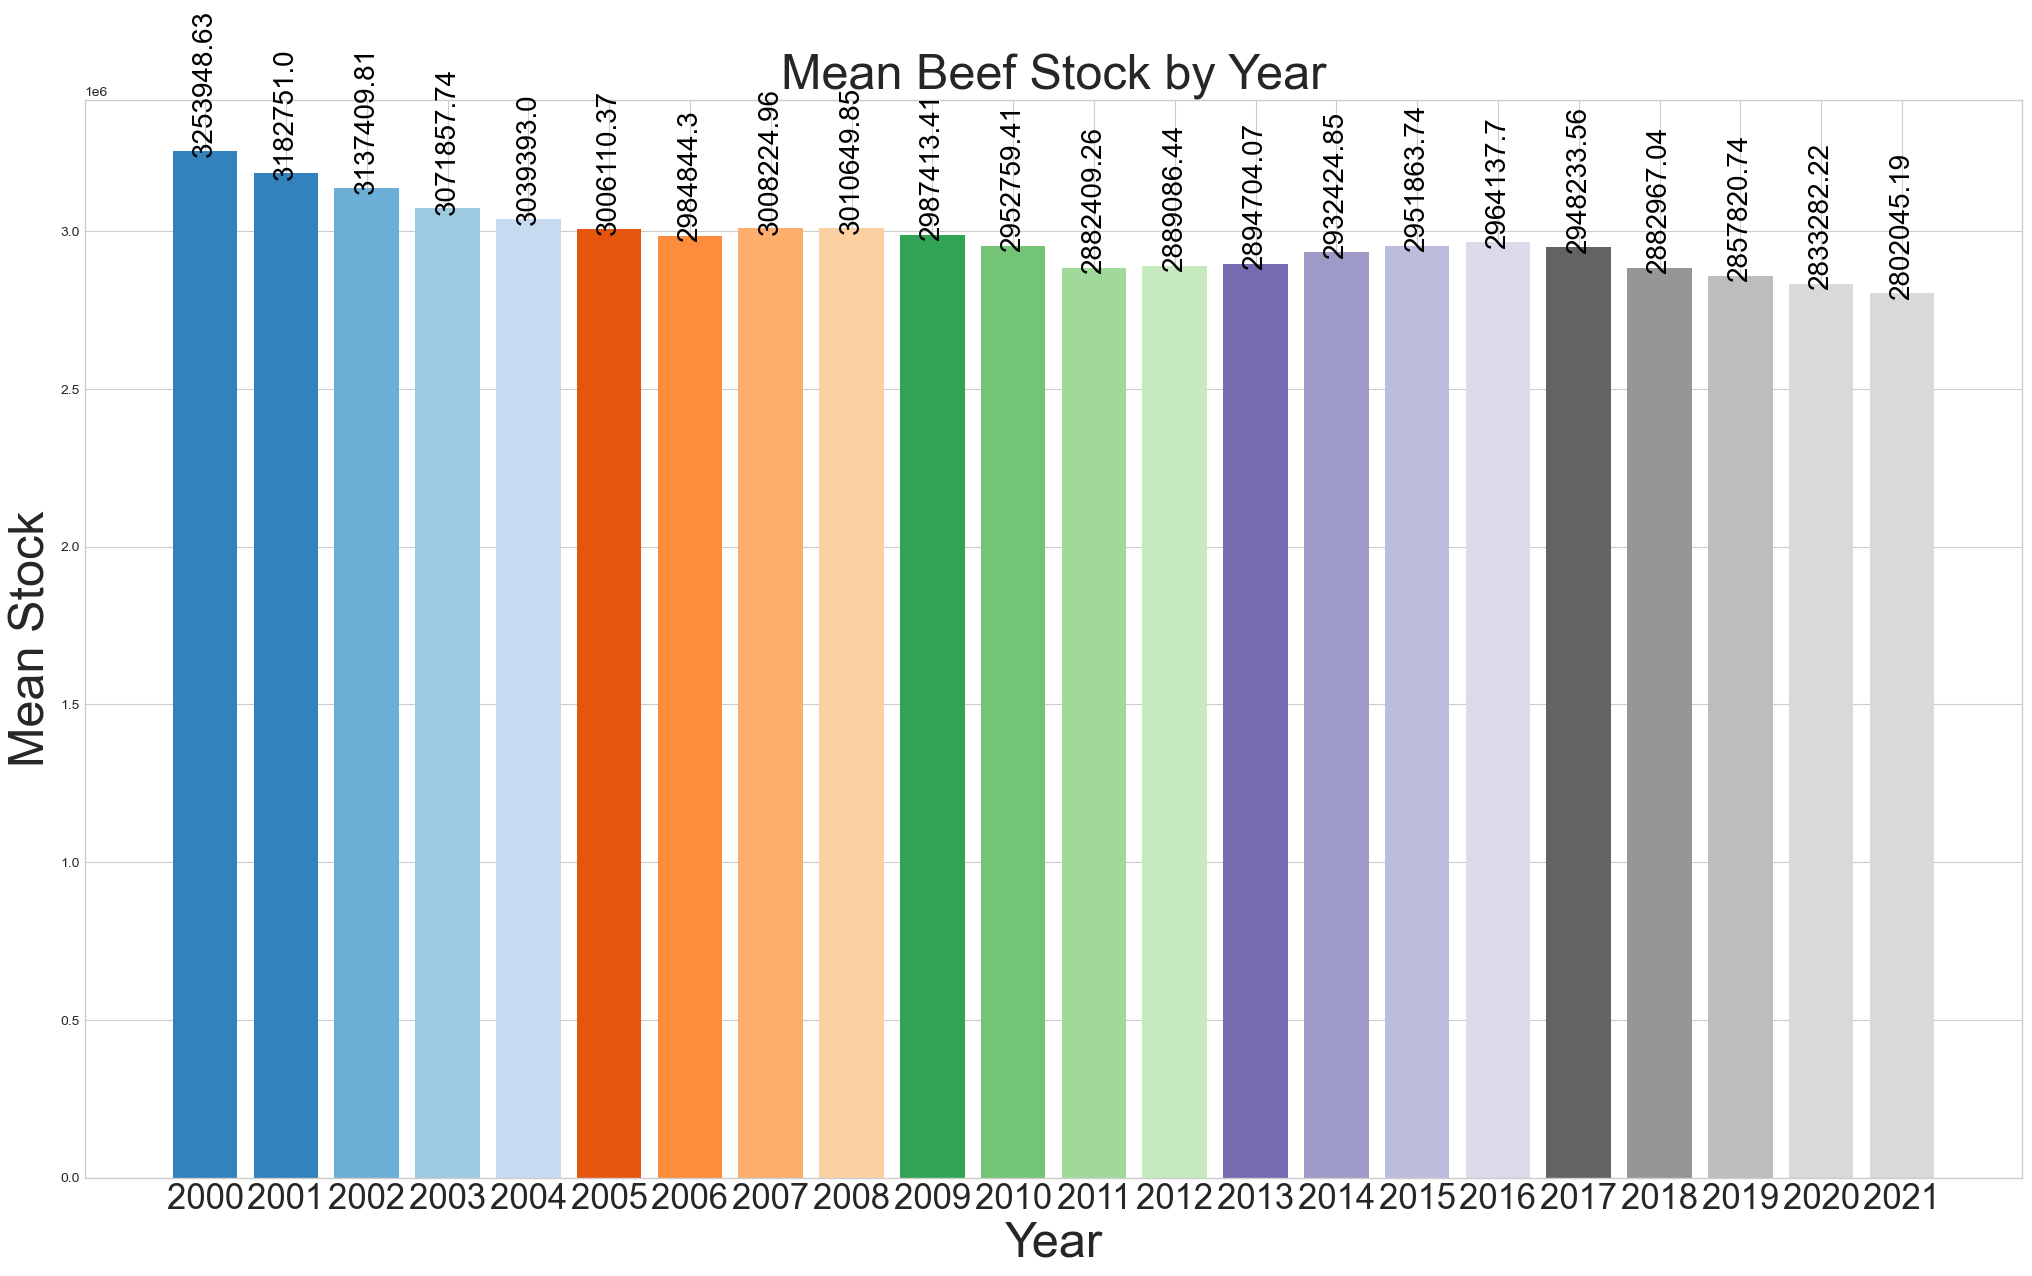

In [231]:
# Group by year and calculate the mean stock
df_grouped = df.groupby('Year')['Stock'].mean().reset_index()

# Generate a list of colors using the tab20c colormap
colors = cm.get_cmap('tab20c', len(df_grouped))

# Create a bar chart of the mean stock values by year
plt.bar(df_grouped['Year'], df_grouped['Stock'], color=colors(range(len(df_grouped))))

# Add labels and title
plt.title('Mean Beef Stock by Year', fontsize=35)
plt.xlabel('Year', fontsize=35)
plt.ylabel('Mean Stock', fontsize=35)
plt.xticks(df_grouped['Year'], fontsize=25)

# Add text labels to the bars
for i, v in enumerate(df_grouped['Stock']):
    plt.text(df_grouped['Year'][i], v, str(round(v, 2)), color='black', ha='center', fontsize=20, rotation=90)




plt.show()



In [232]:
df['Key'] = df['Country'] + df['Year'].astype(str)
countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
df = df[df['Country'].isin(countries_to_keep)]
df = df[(df['Year'] >= 2002) & (df['Year'] <= 2020)]   # Back iteration from decision in 03_notebook
df.tail()

,Country,Year,Stock,Key
1641,Spain,2016,6257057,Spain2016
1642,Spain,2017,6465747,Spain2017
1643,Spain,2018,6510590,Spain2018
1644,Spain,2019,6600330,Spain2019
1645,Spain,2020,6636430,Spain2020


In [233]:
df.to_csv('clean/stock.csv', index=False) # Stash it away
# print(os.listdir('clean'))

## We finished up with ...
- We check that our cleaned files are where they should be
- We read our master back into df
- We take a look 
- Deleting the df variable using del as a means of managing memory

## Run notebook 02_data_wrangling_beef.jpynb from the  root directory next.

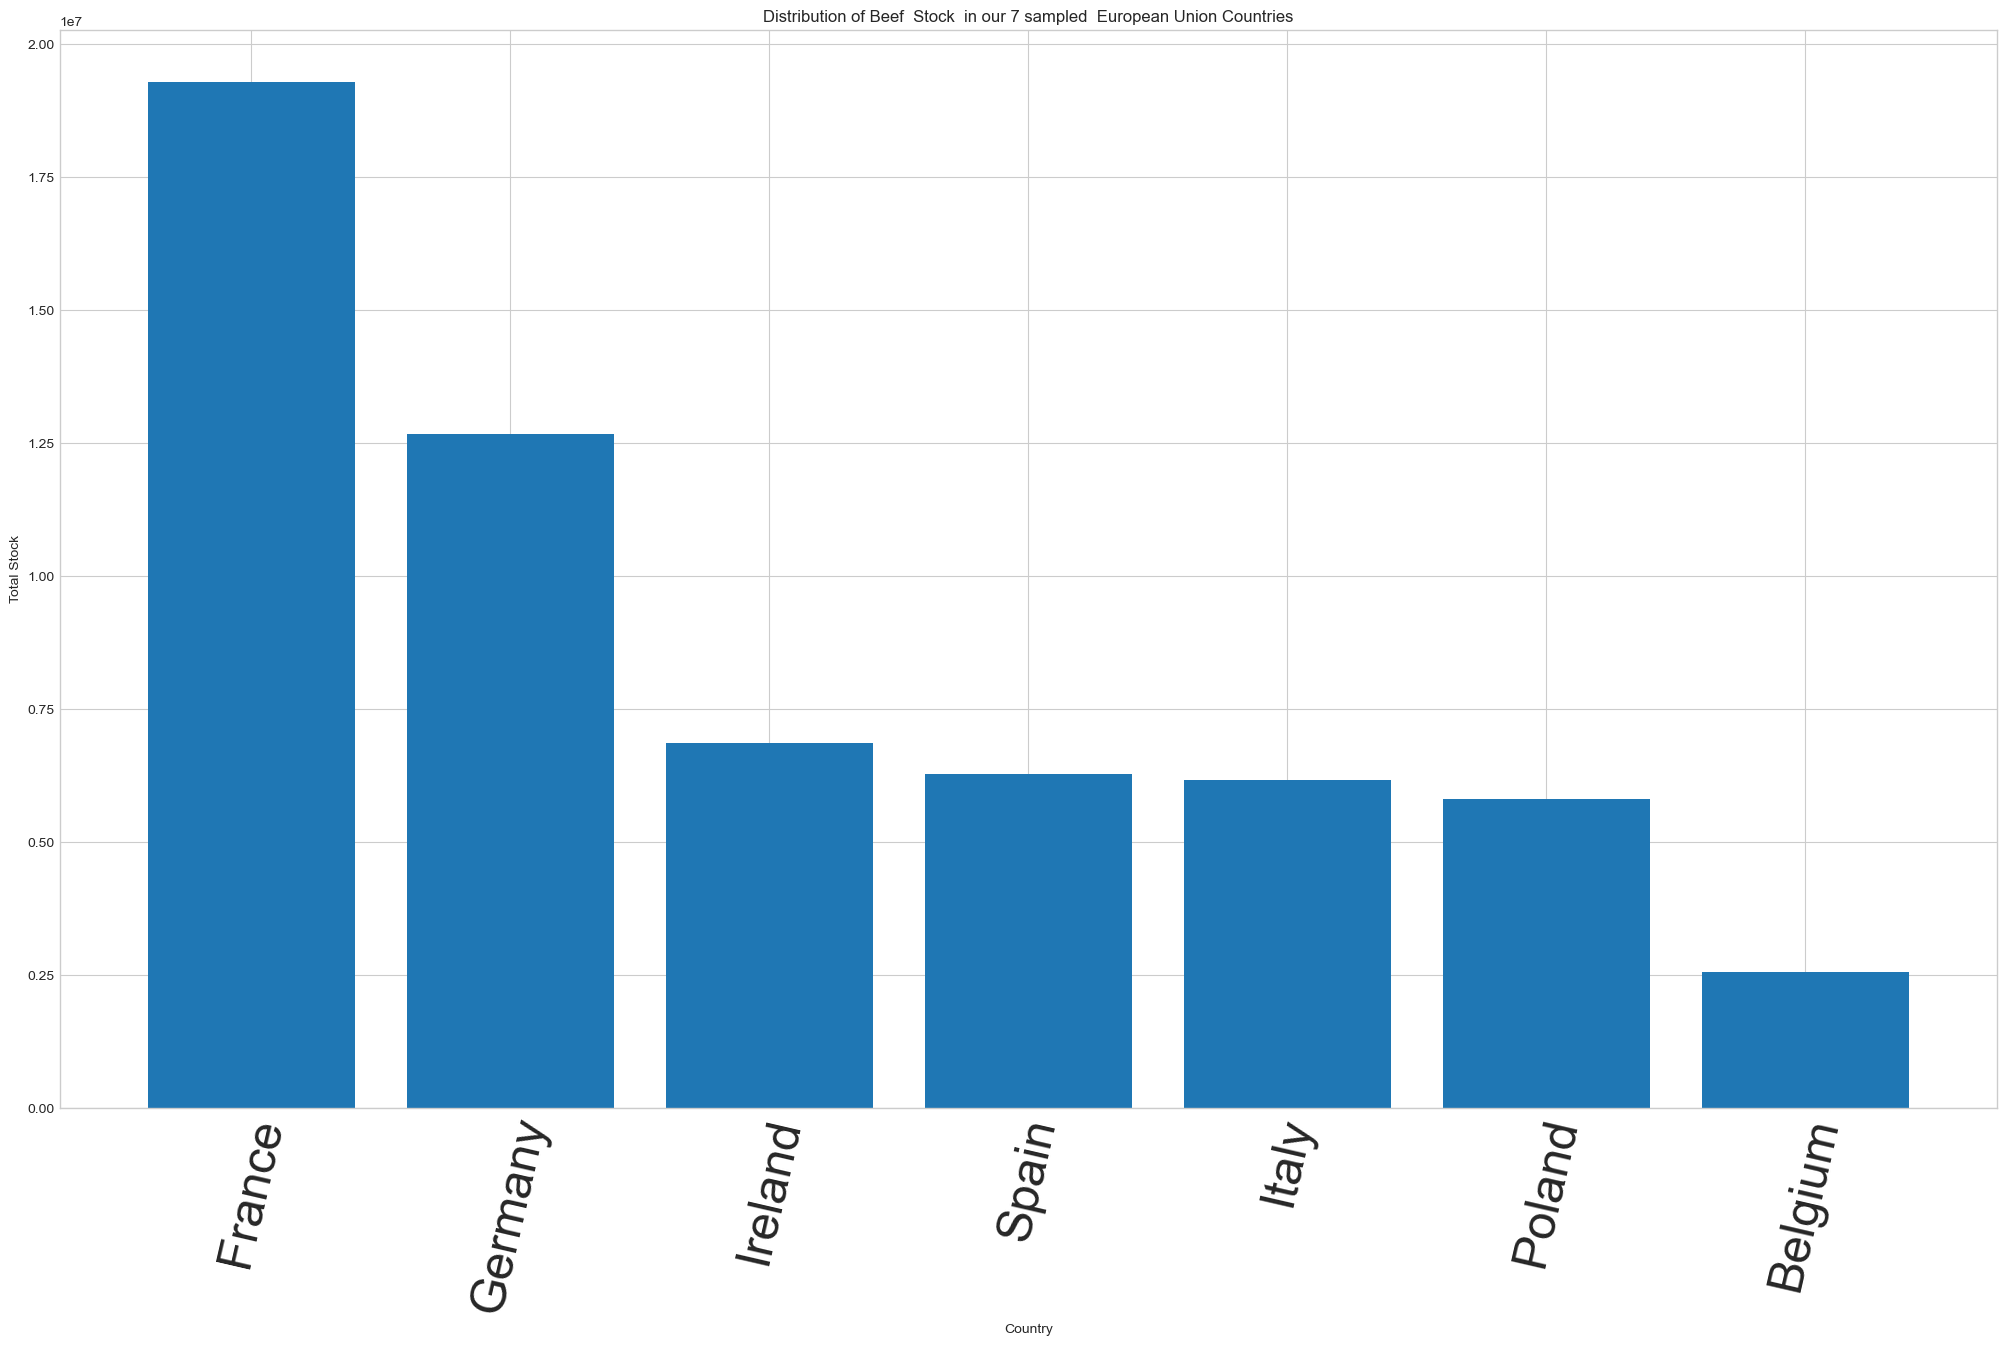

There is a distinct elbow at the Netherlands and as we will see later there is  a lot of missing nutrient data for the Netherlands  so we choose the top 6 countries


In [234]:
#managing warnings(ignoring them mostly)
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)     
# warnings.filterwarnings('ignore')
pd.options.mode.use_inf_as_na = True
#setting display options
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (25, 14)
plt.style.use('seaborn-whitegrid')

from matplotlib.pyplot import cm
color = 'tab20c'

df_grouped = df.groupby('Country')['Stock'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='Stock', ascending=False).reset_index(drop=True)
plt.bar(df_grouped['Country'][:len(df_grouped)], df_grouped['Stock'][:len(df_grouped)])
plt.title('Distribution of Beef  Stock  in our 7 sampled  European Union Countries')
plt.xlabel('Country')
plt.ylabel('Total Stock')
plt.xticks(rotation = 77, fontsize=35)




plt.show()
print('There is a distinct elbow at the Netherlands and as we will see later there is  a lot of missing nutrient data for the Netherlands  so we choose the top 6 countries')

In [237]:
# # Group by year and calculate the mean stock
# df_grouped = df.groupby('Year')['Stock'].mean().reset_index()

# # Generate a list of colors using the tab20c colormap
# colors = cm.get_cmap('tab20c', len(df_grouped))

# # Create a bar chart of the mean stock values by year
# plt.bar(df_grouped['Year'], df_grouped['Stock'], color=colors(range(len(df_grouped))))

# # Add labels and title
# plt.title('Mean Beef Stock by Year', fontsize=35)
# plt.xlabel('Year', fontsize=35)
# plt.ylabel('Mean Stock', fontsize=35)
# plt.xticks(df_grouped['Year'], fontsize=25)


# # Add text labels to the bars
# for i, v in enumerate(df_grouped['Stock']):
#     plt.text(df_grouped['Year'][i], v, str(round(v, 2)), color='black', ha='center', fontsize=20, rotation=90)


# plt.show()


In [238]:
    
"""
In this code, the open() function is used to create a file object
that points to the file 'data/countries_to_keep.pickle', which is a 
file located in the "data" directory. If the "data" directory does not exist, 
it will be created automatically when you run this code.

"""      
import pickle
# Define the list to be saved
countries_to_keep = ['France', 'Germany', 'Ireland', 'Spain', 'Italy', 'Poland', 'Belgium']
# Save the list to a file in the "data" directory
with open('output/countries_to_keep.pickle', 'wb') as f:
    pickle.dump(countries_to_keep, f)
# To reopen from any notebook
# import pickle
# # Open the pickle file and load the list
# with open('countries_to_keep.pickle', 'rb') as f:
#     countries_to_keep = pickle.load(f)
# # Print the list
# print(countries_to_keep)

In [239]:
    
# group by country and calculate mean stock
df_grouped = df.groupby('Country')['Stock'].mean().reset_index()

# sort by mean stock in descending order
df_grouped = df_grouped.sort_values(by='Stock', ascending=False).reset_index(drop=True)

os.listdir('output')

['countries_to_keep.pickle']

In [240]:
df.head()

,Country,Year,Stock,Key
102,Belgium,2002,2891260,Belgium2002
103,Belgium,2003,2778077,Belgium2003
104,Belgium,2004,2738648,Belgium2004
105,Belgium,2005,2698649,Belgium2005
106,Belgium,2006,2669076,Belgium2006


### Boxplot  of cattle stock

The boxplot shows the distribution of cattle stock in the countries we are keeping in our research, as well as a few marginal outliers.

The box itself represents the interquartile range (IQR), with the lower and upper bounds of the box marking the 25th and 75th percentiles, respectively. The horizontal line inside the box represents the median of the data.

Any values outside of the whiskers (lines extending from the box) are considered outliers, and are shown as individual data points. In this case, the outliers represent values that are more than 1.5 times the IQR away from the box and as mentioned abaove are marginal and deemed valid.

The boxplot allows for easy comparison of the distribution of cattle stock between different countries. It also helps to identify any extreme and skewed data. The conclusion here is that the data is clean and distribution does not indicate any errors.



### Outliers in Cattle Stock Data
- Outliers while present for France, Germany, Italy, and Belgium are not extreme.
- They are official figures and are judged to be probably accurate

Text(0.5, 1.0, 'Cattle Stock Boxplots by Country')

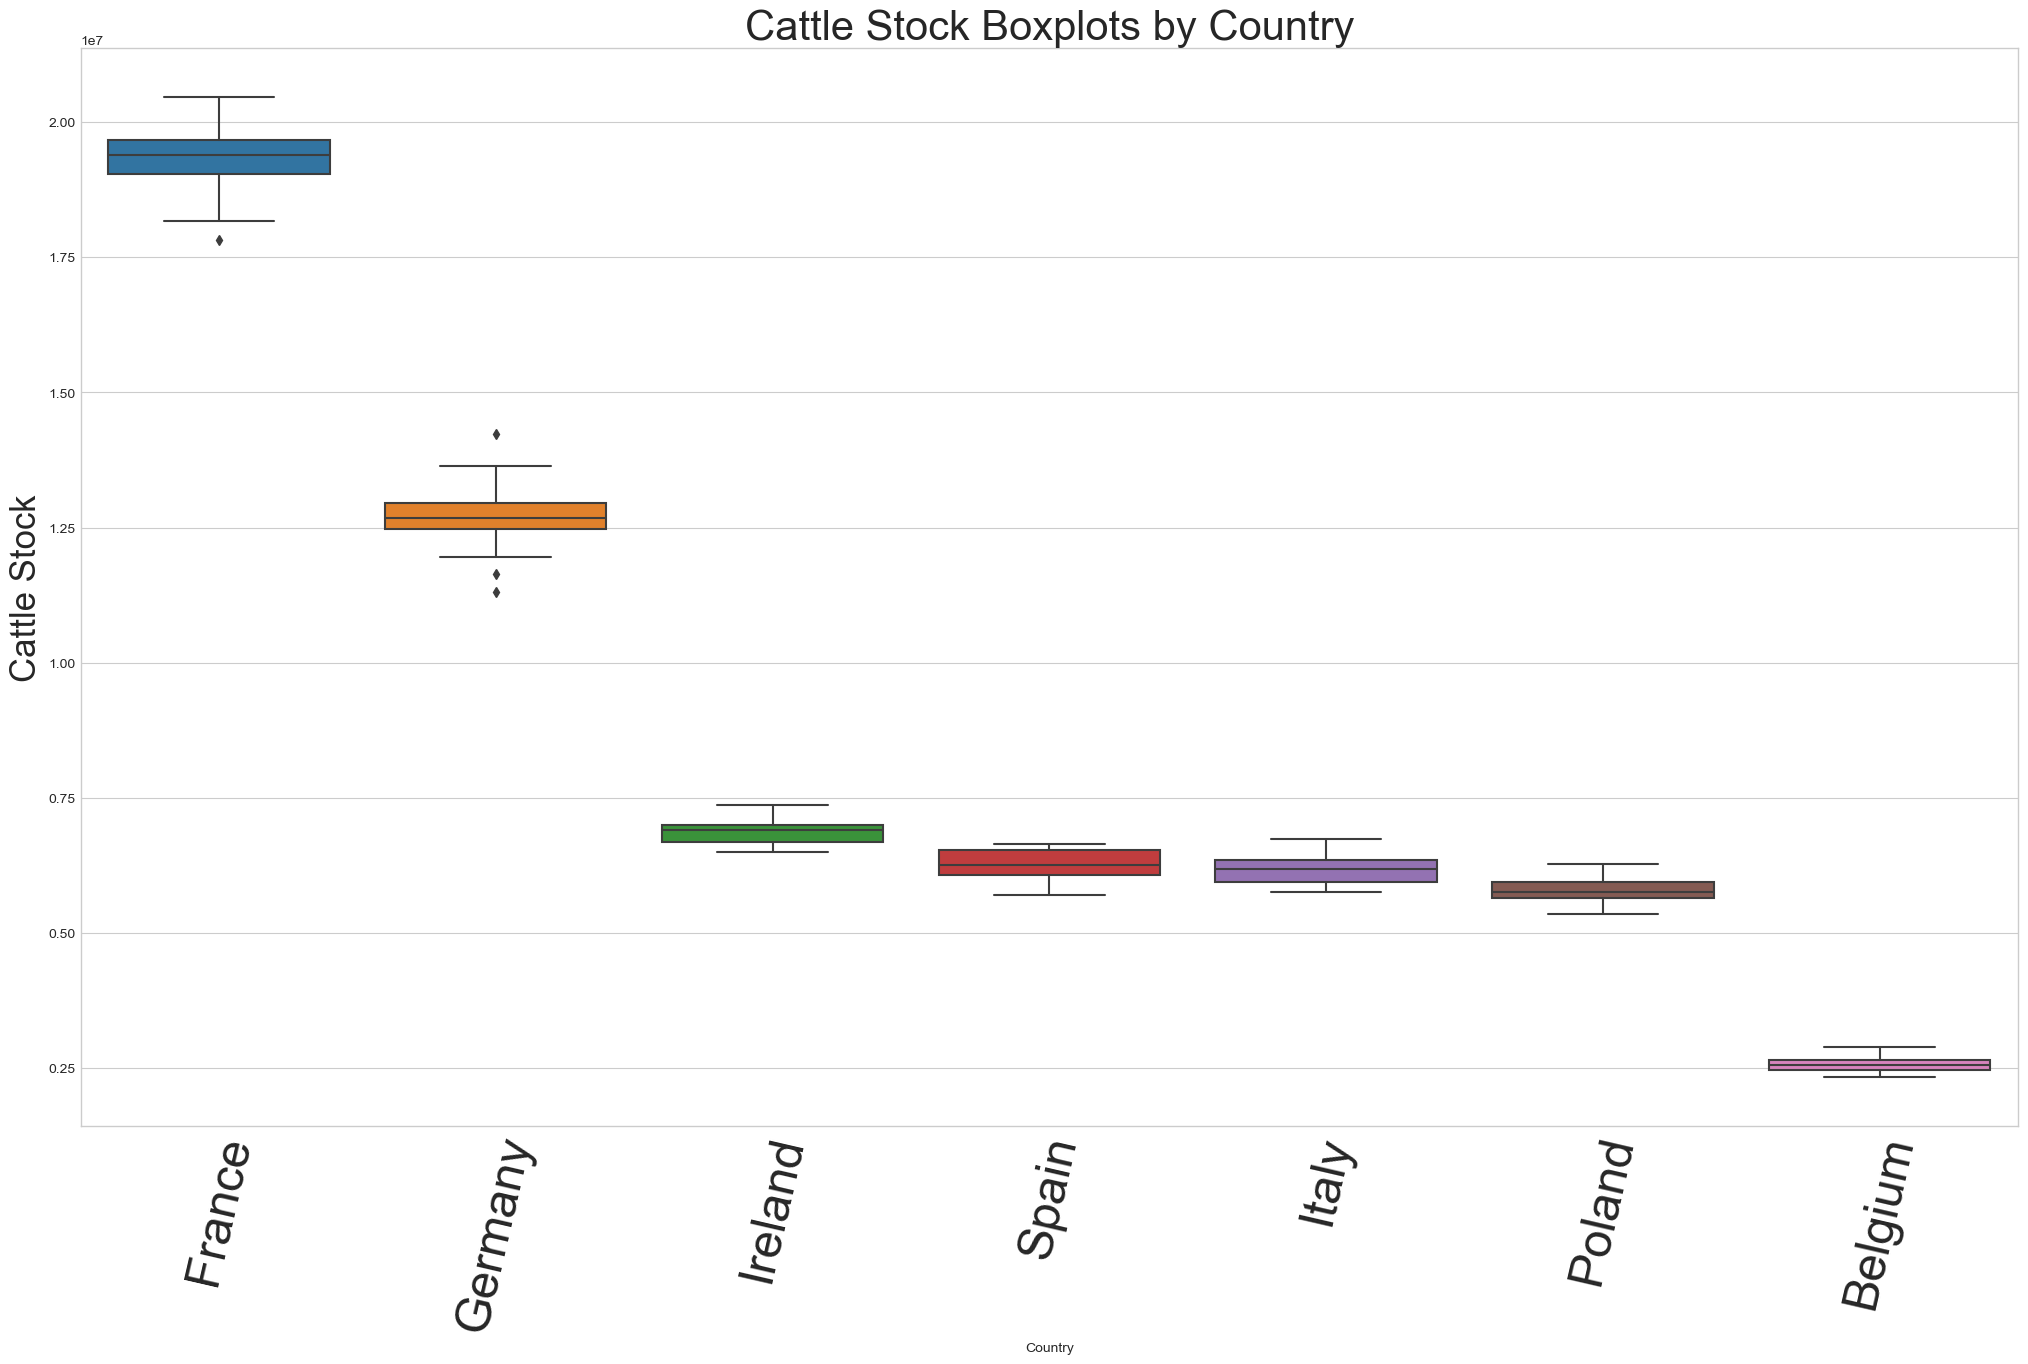

In [243]:
import seaborn as sns
import pandas as pd

# Create a new DataFrame that aggregates the median values of Stock by Country
median_stocks = df.groupby('Country')['Stock'].median().reset_index()

# Sort the DataFrame by the median values of Stock in descending order
median_stocks = median_stocks.sort_values('Stock', ascending=True)

# Pass the reversed order of the Country column to the order parameter of the boxplot function
sns.boxplot(x="Country", y="Stock", data=df, order=median_stocks['Country'][::-1])
# plt.xlabel('Country', fontsize=25)
plt.ylabel('Cattle Stock', fontsize=25)
plt.xticks(rotation = 77, fontsize=35);
plt.title('Cattle Stock Boxplots by Country', fontsize=30)



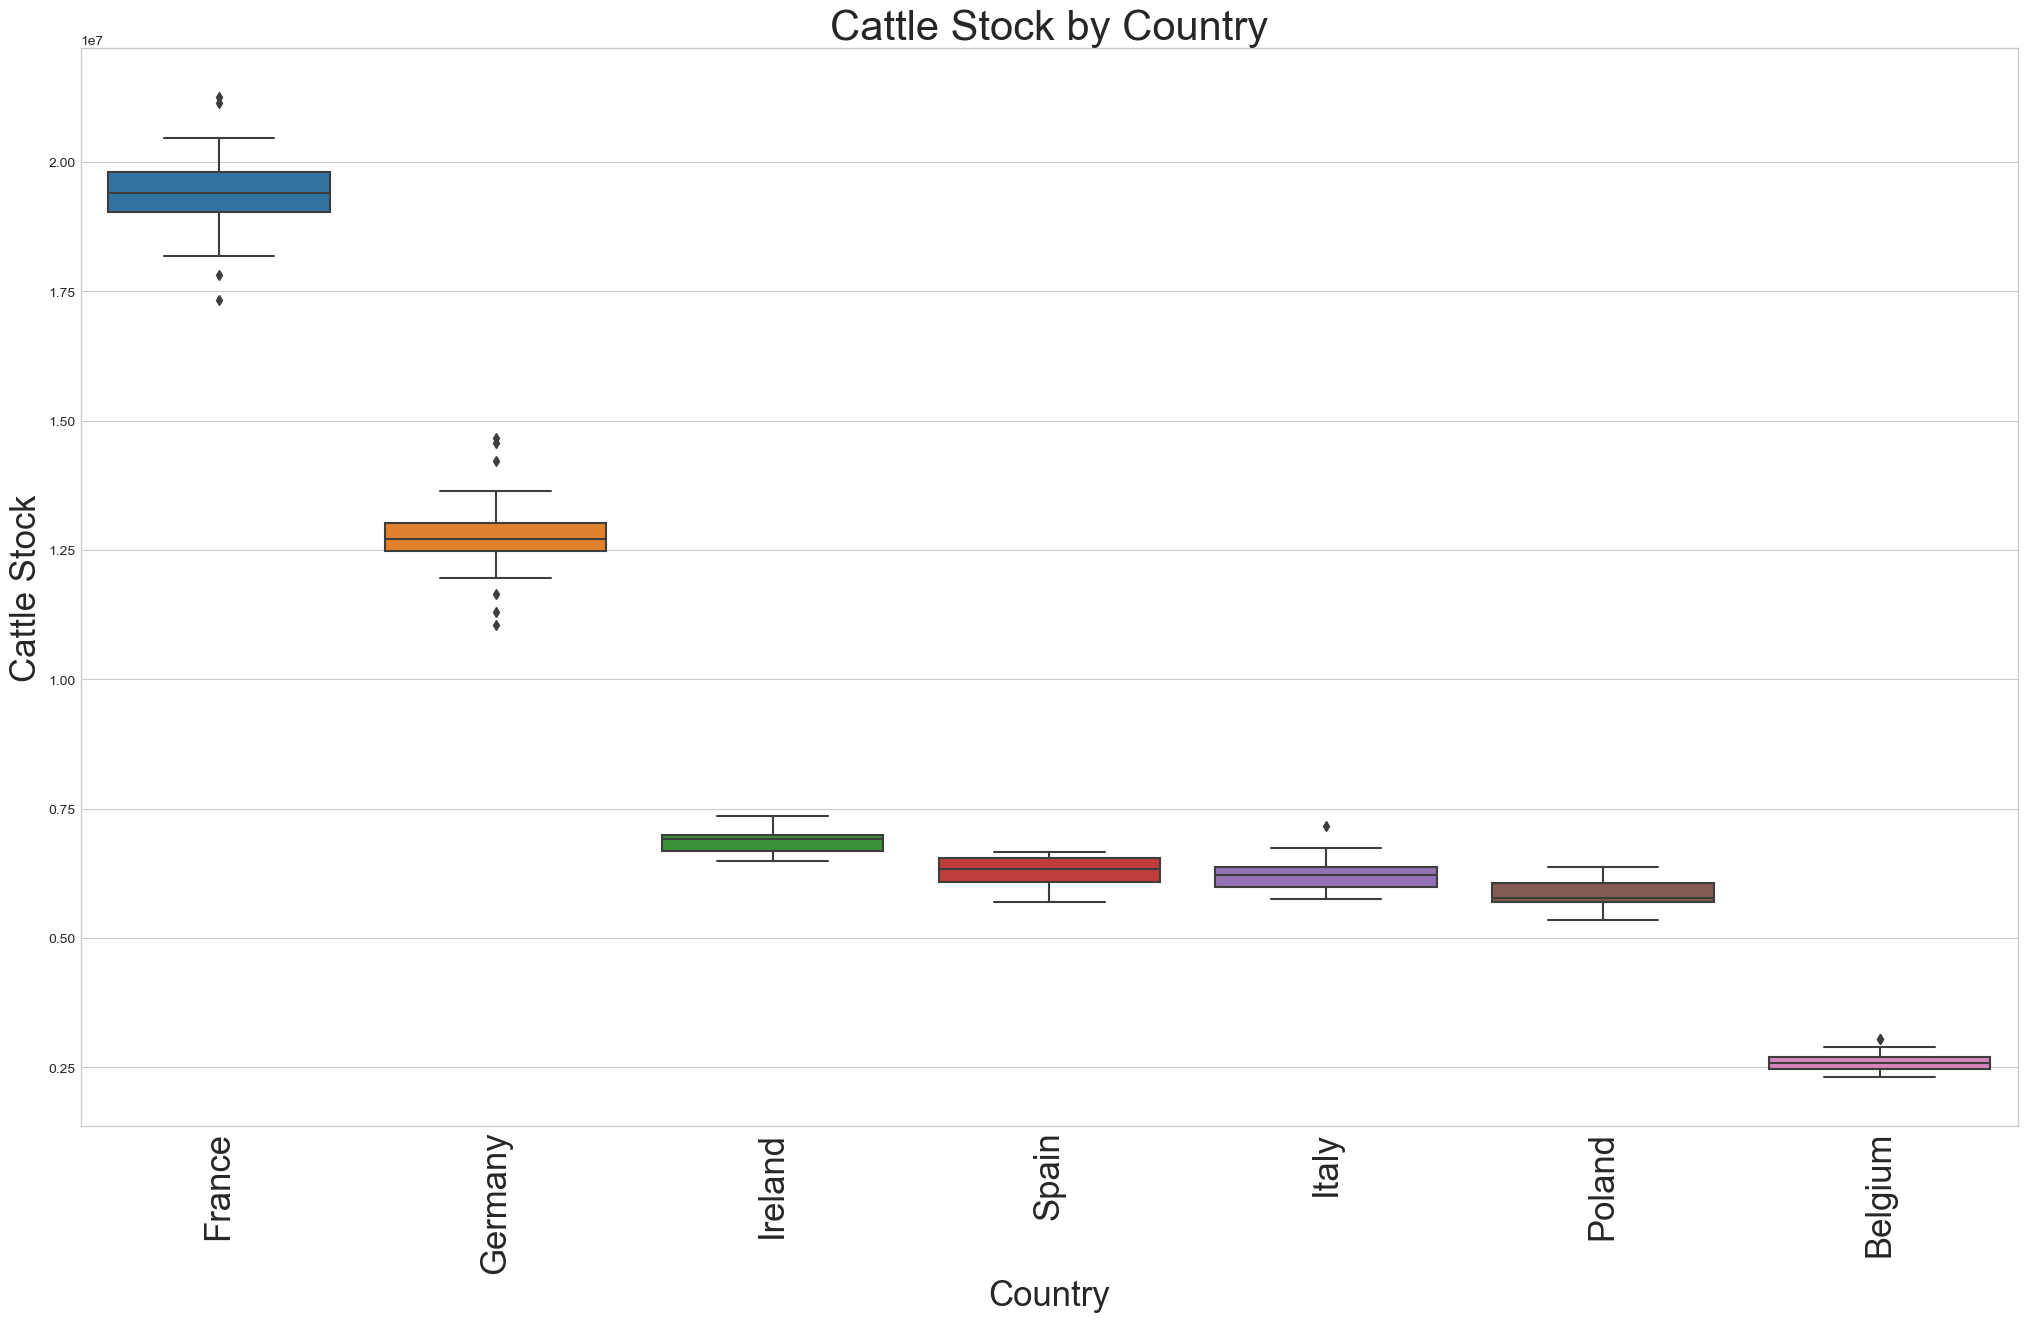

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean stock by country and sort in descending order
avg_stock = df.groupby('Country')['Stock'].mean().sort_values(ascending=False)

# Create a list of countries in the desired order
order = list(avg_stock.index)

# Create the boxplot with the desired order of countries
sns.boxplot(x="Country", y="Stock", data=df, order=order)

# Customize the plot labels and fonts
plt.xticks(rotation=90, fontsize=25)
plt.xlabel('Country', fontsize=25)
plt.ylabel('Cattle Stock', fontsize=25)
plt.title('Cattle Stock by Country', fontsize=30)

# Show the plot
plt.show()


In [249]:
# Cast the "Year" column to integer data type
df['Year'] = df['Year'].dt.year.astype(int)
df


AttributeError: Can only use .dt accessor with datetimelike values

In [111]:




# def clean(df):
#     # Rename 'Area' to 'Country'
#     df = df.rename(columns={'Area': 'Country'})

#     # Select the desired columns
#     cols_to_keep = ['Country', 'Element', 'Item', 'Year', 'Unit', 'Value']
#     df = df[cols_to_keep]

#     # Filter to years greater than 2001
#     df = df[df['Year'] > 2001]

#     # Filter to countries in the list of countries to keep
#     df = df[df['Country'].str.lower().isin(kept_countries)]

#     # Create a 'Key' column with Country and Year
#     df['Key'] = df['Country'] + df['Year'].astype(str)

#     return df



In [112]:
# mp=pd.read_csv('raw/meadowsPasture.csv')

# mp=clean(mp)




In [86]:
# # Create a new DataFrame with only the specified columns
# mp= mp.loc[:, ['Area', 'Item', 'Year', 'Value', 'Flag']]
# mp


,Area,Item,Year,Value,Flag
0,Austria,Land under temp. meadows and pastures,2000,NaN,NaN
1,Austria,Land under temp. meadows and pastures,2001,137.200,A
2,Austria,Land under temp. meadows and pastures,2002,144.500,A
3,Austria,Land under temp. meadows and pastures,2003,151.616,A
4,Austria,Land under temp. meadows and pastures,2004,157.800,A
...,...,...,...,...,...
1129,Spain,Land under perm. meadows and pastures,2016,9232.690,A
1130,Spain,Land under perm. meadows and pastures,2017,9310.363,A
1131,Spain,Land under perm. meadows and pastures,2018,9412.960,A
1132,Spain,Land under perm. meadows and pastures,2019,9446.884,A


In [116]:
mp.to_csv('clean/meadowpasture.csv', index=False)

In [118]:
os.listdir('clean')

['arch',
 'areas.npy',
 'AreasEU.csv',
 'beluxPivot.csv',
 'beneluxPivot.csv',
 'beneluxPivot.npy',
 'benelux_pivot.csv',
 'cattle_stocks.csv',
 'kept_countries.txt',
 'meadowpasture.csv',
 'missing.csv',
 'missing.npy',
 'nutrient2002',
 'nutrient2002.csv',
 'orderedstock.csv',
 'rain.csv',
 'stock.csv',
 'stockkey.csv',
 'stock_cckp.csv',
 'temperature.csv',
 'topstock.txt',
 'top_10_countries_stock.csv',
 'top_countries.txt',
 'top_countries_stock.csv']